In [51]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
# allow plots to appear directly in the notebook
%matplotlib inline

In [52]:
gold_data = pd.read_csv('C:/Users/dell/Desktop/Gold/GOLD.csv')
gold_data

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
0,"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
1,"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
2,"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
3,"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
4,"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318
...,...,...,...,...,...,...,...,...,...
507,"Apr 26, 2019",31868,31851,31934,31705,9.67K,0.08%,NaN,247.177322
508,"Apr 30, 2019",31625,31800,31824,31597,6.44K,-0.76%,NaN,52.201158
509,"May 01, 2019",31563,31604,31657,31503,1.55K,-0.20%,NaN,113.293305
510,"May 02, 2019",31203,31420,31425,31160,0.48K,-1.14%,NaN,48.365693


In [53]:
gold_data.shape

(512, 9)

In [54]:
df = gold_data.dropna()
df

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
0,"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
1,"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
2,"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
3,"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
4,"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318
...,...,...,...,...,...,...,...,...,...
406,"Dec 04, 2018",30964,30874,31085,30874,0.08K,0.57%,-31.0,301.615081
407,"Dec 05, 2018",30926,30830,30970,30825,0.04K,-0.12%,72.0,241.475101
408,"Dec 06, 2018",31005,31039,31196,30974,10.55K,0.26%,35.0,188.222186
409,"Dec 07, 2018",31440,31011,31480,30941,11.24K,1.40%,669.0,976.692705


In [55]:
from sklearn.linear_model import LinearRegression

Slope: [[-0.00823083]]
Intercept: [343.67028421]
Root mean squared error:  73300.46132887459
R2 score:  3.732507600850976e-05


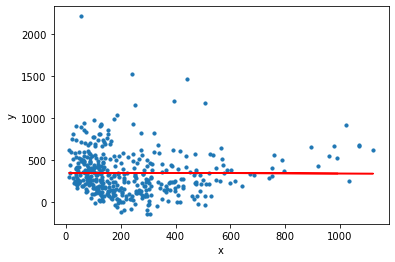

In [56]:
from sklearn.metrics import mean_squared_error, r2_score
#dataset
y = np.array(df["Pred"])
x = np.array(df["new"])
x = x.reshape(-1,1)
y = y.reshape(-1,1)
regression_model = LinearRegression()
regression_model.fit(x, y)
y_predicted = regression_model.predict(x)
rmse = mean_squared_error(y, y_predicted)
r2 = r2_score(y, y_predicted)
print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)
plt.scatter(x, y, s=10)
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, y_predicted, color='r')
plt.show()

In [57]:
previous_data = gold_data[:]
previous_data_new = previous_data['new']
prevdata = previous_data_new.values.reshape(-1,1)
na_data = (regression_model.predict(prevdata))
na_data_series = pd.Series(na_data.ravel())
sata = na_data_series.to_frame()
gold_data['Pred'] = sata
gold_data

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
0,"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,342.702580,117.570740
1,"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,341.238649,295.430176
2,"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,342.582797,132.123714
3,"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,342.836517,101.298064
4,"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,342.747169,112.153318
...,...,...,...,...,...,...,...,...,...
507,"Apr 26, 2019",31868,31851,31934,31705,9.67K,0.08%,341.635810,247.177322
508,"Apr 30, 2019",31625,31800,31824,31597,6.44K,-0.76%,343.240625,52.201158
509,"May 01, 2019",31563,31604,31657,31503,1.55K,-0.20%,342.737786,113.293305
510,"May 02, 2019",31203,31420,31425,31160,0.48K,-1.14%,343.272194,48.365693


Slope: [[-121.49444741]]
Intercept: [41754.03127127]
Root mean squared error:  1.2291678799353053e-23
R2 score:  1.0


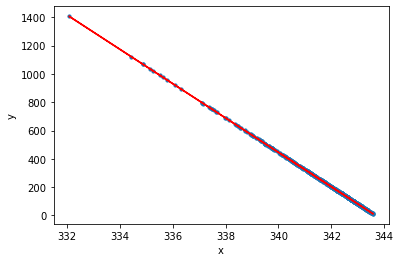

In [58]:
from sklearn.metrics import mean_squared_error, r2_score
y = np.array(gold_data["new"])
x = np.array(gold_data["Pred"])
x = x.reshape(-1,1)
y = y.reshape(-1,1)
regression_model = LinearRegression()
regression_model.fit(x, y)
y_predicted = regression_model.predict(x)
rmse = mean_squared_error(y, y_predicted)
r2 = r2_score(y, y_predicted)
print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)
plt.scatter(x, y, s=10)
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, y_predicted, color='r')
plt.show()

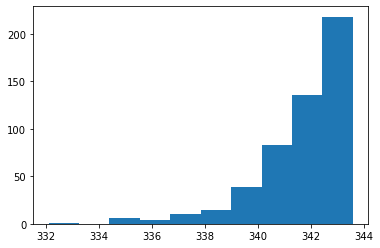

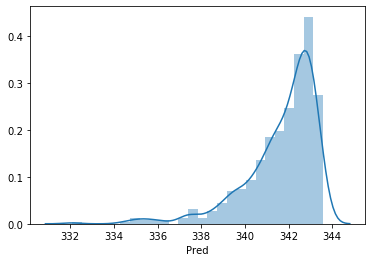

In [59]:
plt.hist(gold_data['Pred'])
plt.show()
sns.distplot(gold_data['Pred'])
plt.show()

In [60]:
itc_data = pd.read_csv('C:/Users/dell/Desktop/Large_Cap/Large_Cap/ITC.csv')
itc_data['Date'] = pd.to_datetime(itc_data['Date'])
itc_data = itc_data.sort_values('Date')
itc_data.set_index('Date', inplace=True)
itc_data

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
Date,,,,,,,,,,,,,,
2017-05-15,ITC,EQ,274.95,275.90,278.90,275.50,278.50,277.95,277.78,5462855,1.517477e+09,52501,4128324,75.57
2017-05-16,ITC,EQ,277.95,278.50,284.30,278.00,283.00,283.45,280.93,11204308,3.147583e+09,98347,8307567,74.15
2017-05-17,ITC,EQ,283.45,284.10,284.40,279.25,281.50,281.65,281.56,8297700,2.336261e+09,99107,5924804,71.40
2017-05-18,ITC,EQ,281.65,278.00,281.05,277.05,277.65,277.90,278.49,7924261,2.206822e+09,47830,5434449,68.58
2017-05-19,ITC,EQ,277.90,282.25,295.65,281.95,286.40,286.20,290.08,35724128,1.036268e+10,248579,19137631,53.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-07,ITC,EQ,307.00,308.25,309.50,300.85,302.45,301.90,305.31,8655871,2.642695e+09,99220,4557484,52.65
2019-05-08,ITC,EQ,301.90,300.00,303.40,298.65,300.60,300.65,301.46,7876031,2.374343e+09,104147,4687591,59.52
2019-05-09,ITC,EQ,300.65,299.40,301.30,296.35,299.85,299.85,299.17,10223616,3.058551e+09,129794,5965688,58.35


In [61]:
nifty_data = pd.read_csv('C:/Users/dell/Desktop/Nifty50/Nifty50/Nifty50.csv')
nifty_data['Date'] = pd.to_datetime(nifty_data['Date'])
nifty_data = nifty_data.sort_values('Date')
nifty_data.set_index('Date', inplace=True)
nifty_data

,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
Date,,,,,,
2017-05-15,9433.55,9449.25,9423.10,9445.40,145163953,7790.97
2017-05-16,9461.00,9517.20,9456.35,9512.25,171709433,9209.89
2017-05-17,9517.60,9532.60,9486.10,9525.75,211856040,10726.23
2017-05-18,9453.20,9489.10,9418.10,9429.45,199340647,10782.46
2017-05-19,9469.90,9505.75,9390.75,9427.90,259861396,11544.77
...,...,...,...,...,...,...
2019-05-07,11651.50,11657.05,11484.45,11497.90,337495624,16632.84
2019-05-08,11478.70,11479.10,11346.95,11359.45,372826025,17440.01
2019-05-09,11322.40,11357.60,11255.05,11301.80,373028059,17602.86


In [62]:
fil_itc = itc_data[405:]
fil_nifty = nifty_data[405:]

In [63]:
return_itc = fil_itc['Close Price'].pct_change()
return_nifty = fil_nifty['Close'].pct_change()

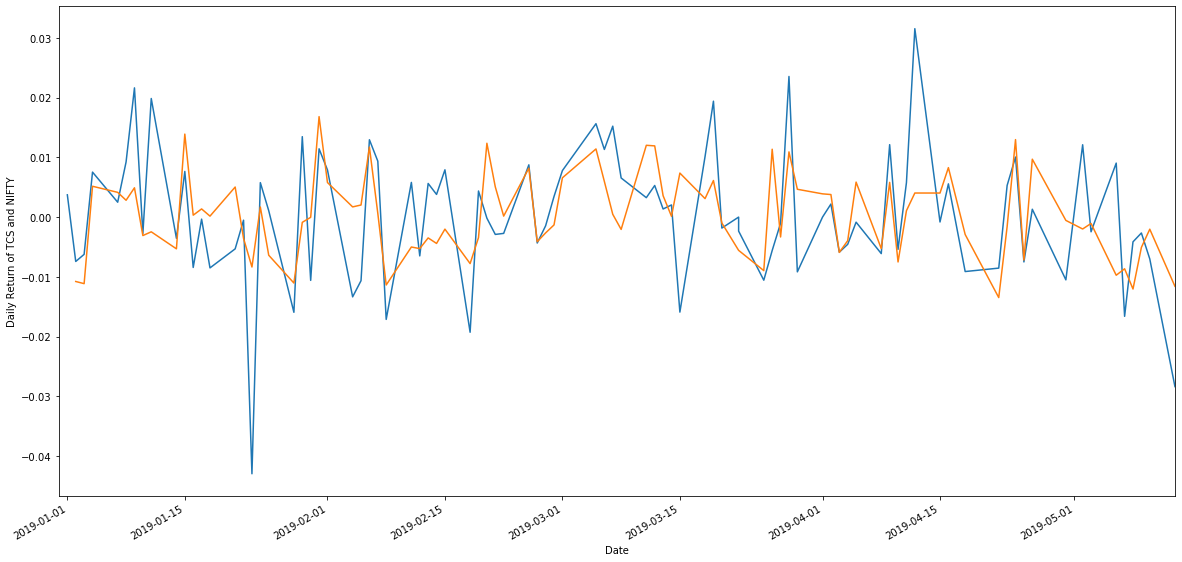

In [64]:
plt.figure(figsize=(20,10))
return_itc.plot()
return_nifty.plot()
plt.ylabel("Daily Return of TCS and NIFTY")
plt.show()

In [65]:
fil_itc['pct_change'] = fil_itc['Close Price'].pct_change()
fil_nifty['pct_change'] = fil_nifty['Close'].pct_change()

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [66]:
x = fil_itc['pct_change'].dropna()
y = fil_nifty['pct_change'].dropna()

In [73]:
import statsmodels.api as sm
from statsmodels import regression
itc = pd.read_csv('C:/Users/dell/Desktop/Large_Cap/Large_Cap/ITC.csv', parse_dates=True, index_col='Date',)
nifty50 = pd.read_csv('C:/Users/dell/Desktop/Nifty50/Nifty50/Nifty50.csv', parse_dates=True, index_col='Date')
monthly_prices = pd.concat([itc['Close Price'], nifty50['Close']], axis=1)
monthly_prices.columns = ['ITC', 'NIFTY50']
print(monthly_prices.head())
monthly_returns = monthly_prices.pct_change(1)
clean_monthly_returns = monthly_returns.dropna(axis=0)  
print(clean_monthly_returns.head())

               ITC  NIFTY50
Date                       
2017-05-15  277.95  9445.40
2017-05-16  283.45  9512.25
2017-05-17  281.65  9525.75
2017-05-18  277.90  9429.45
2017-05-19  286.20  9427.90
                 ITC   NIFTY50
Date                          
2017-05-16  0.019788  0.007078
2017-05-17 -0.006350  0.001419
2017-05-18 -0.013314 -0.010109
2017-05-19  0.029867 -0.000164
2017-05-22  0.060797  0.001098


In [75]:
X = clean_monthly_returns['ITC']
y = clean_monthly_returns['NIFTY50']
X1 = sm.add_constant(X)
model = sm.OLS(y, X1) # make regression model 
# fit model and print results
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                NIFTY50   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     139.6
Date:                Thu, 28 May 2020   Prob (F-statistic):           1.53e-28
Time:                        10:23:57   Log-Likelihood:                 1802.6
No. Observations:                 495   AIC:                            -3601.
Df Residuals:                     493   BIC:                            -3593.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.000      1.111      0.2

 Daily beta value for the past 3 motnhs for the stock ITCis 0.060797 which is less than 1 and hence it is  less than Nifty50

The monthly beta value for the stock ITC is 0.2390 which is less than 1 and hence it is less volatile than Nifty50